In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
from scipy.io import wavfile
rate, data = wavfile.read("./voyager_images_384khz.wav")
rate, data.shape, data.shape[0] / rate

/tmp/ipykernel_1945/1339261275.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read("./voyager_images_384khz.wav")


(384000, (181960704, 2), 473.856)

In [4]:
# Audio normalization between -1 and 1
# data = (data - np.mean(data)) / np.mean(data)

In [5]:
LEFT_START = int(14.800 * rate)
RIGHT_START = int(15.900 * rate)

In [6]:
# %matplotlib widget
# sample = data[LEFT_START+35*rate:LEFT_START+45*rate, 0]


# plt.close('all')
# ax = sns.lineplot(data=sample[::10])  # downsample for plotting
# 
# start_peaks = np.where(s > IMG_START_PEAK) # 780185
# ax.scatter(peaks, sample[peaks], color='red')

plt.show()

In [7]:
def normalize(image, mode='show', filename="image.png"):
    from PIL import Image
    # image[np.argmax(np.diff(image), axis=1, keepdims=1)] *= -1
    normalized = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    normalized = normalized.astype(np.uint8)
    img = Image.fromarray(normalized.T)

    if mode == 'show':
        img.show()
    elif mode == 'save':
        img.save(filename)

In [8]:
# find_peaks(sample, height=0.22)

In [9]:
from scipy.signal import find_peaks

def split_images(sample, rate, image_s=5, height=0.2):
    peaks = find_peaks(sample, height=0.22, distance=int(rate * 0.6))[0]
    return np.split(sample, peaks)


In [178]:
def get_image_array(sample, rate):
    PEAK_WINDOW = 100 #int(0.0015 * rate)
    VALLEY_WINDOW = 12 #int(0.0015 * rate)
    CUTOFF_WINDOW = 50 #int(0.0001 * rate)
    FRAME_WINDOW = 363 #int(0.0083 * rate)
    # MAIN_WINDOW = 395 #int(0.0088 * rate)

    # print("VALLEY_WINDOW:", VALLEY_WINDOW)
    # print("CUTOFF_WINDOW:", CUTOFF_WINDOW)
    # print("FRAME_WINDOW:", FRAME_WINDOW)
    
    waves = []
    valley = None

    # sample[0] is always valley
    while True:
        peak = np.argmax(sample[:PEAK_WINDOW])
        sample = sample[peak:]

        if FRAME_WINDOW + VALLEY_WINDOW + CUTOFF_WINDOW >= sample.shape[0]:
            break

        valley = np.argmin(sample[:VALLEY_WINDOW])
        valley += np.argmax(sample[valley:valley+CUTOFF_WINDOW])
        window = sample[valley:valley+FRAME_WINDOW]

        if window.shape == (FRAME_WINDOW, ):
            waves.append(-window)
        else:
            pass
            # print("Skipped window:", window.shape)
        
        sample = sample[FRAME_WINDOW:]
        if PEAK_WINDOW >= sample.shape[0]:
            break

    waves = np.array(waves)
    return waves



In [179]:
from scipy.signal import resample, resample_poly

# sample = data[LEFT_START:, 0]
sample = data[LEFT_START+30*rate:LEFT_START+60*rate, 0]
print(rate, sample.shape, sample.shape[0] / rate)

sample = resample_poly(sample, 44100, rate)
new_rate = 44100
print(new_rate, sample.shape, sample.shape[0] / new_rate)

chunks = split_images(sample, new_rate, height=0.19)

print(f"Found {len(chunks)} image chunks")


384000 (11520000,) 30.0
44100 (1323000,) 30.0
Found 7 image chunks


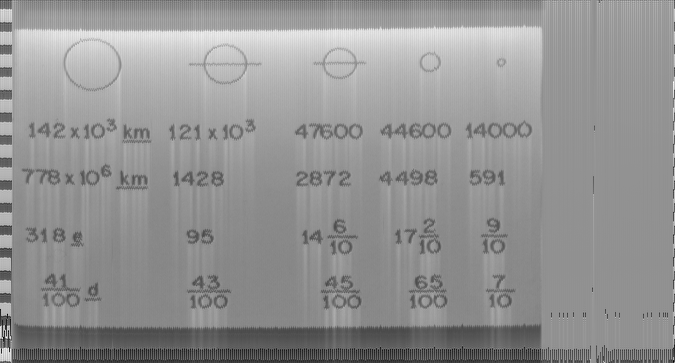

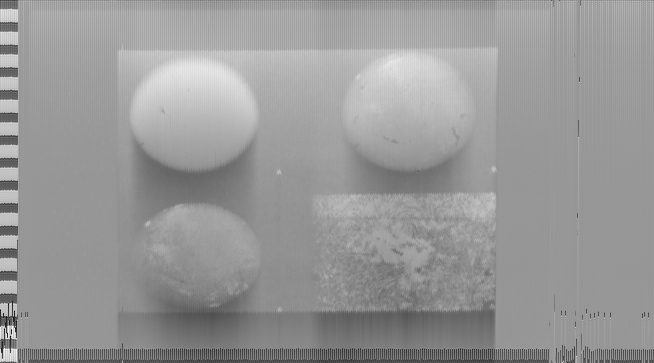

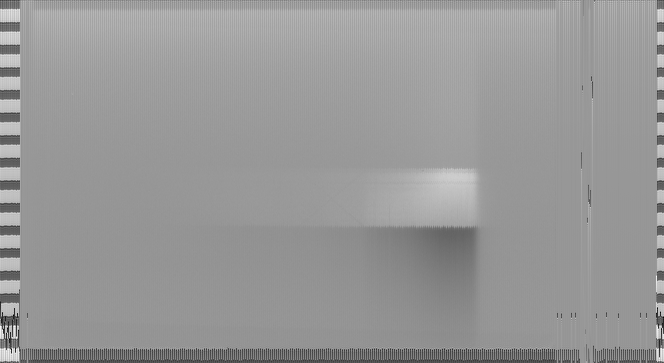

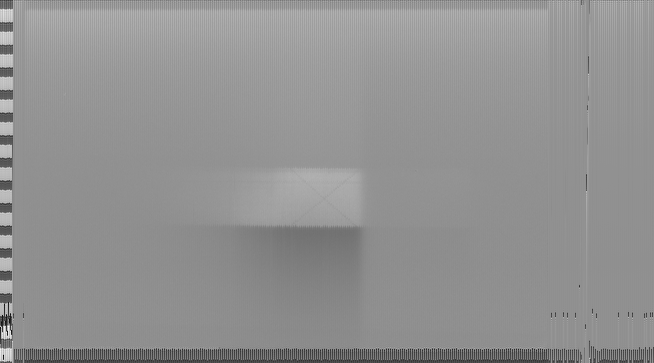

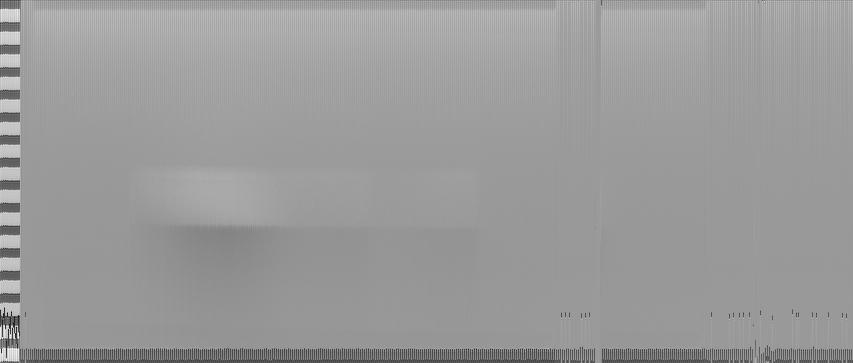

In [180]:

for i, chunk in enumerate(chunks):
    if chunk.shape[0] > 5 * new_rate:
        im_arr = get_image_array(chunk, new_rate)
        normalize(im_arr, mode='show', filename=f'output_images/im_{i}.png')

